# Get Data


In [1]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz

file_id = '12nRGXBL6u38sCET_x1OmLW6Hlthob-e_' # app_data_final.csv
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
# The shareable link
link = 'https://drive.google.com/open?id=12nRGXBL6u38sCET_x1OmLW6Hlthob-e_'

In [4]:
# Verify everything after '='
fluff, id = link.split('=')
print (id) 

12nRGXBL6u38sCET_x1OmLW6Hlthob-e_


### Import libraries and prepare the data

In [5]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size']=24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale=2)

# To ignore deprecation warnings
import warnings
warnings.filterwarnings("ignore")

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment=None

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [6]:
# Stored dataset in a Pandas Dataframe
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('app_data_final.csv') 

# Read in data into a dataframe
df = pd.read_csv('app_data_final.csv')

# Display top of dataframe
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,NaN,1,0,Laborers,1.0,2,10,Business Entity Type 3,0.083037,0.262949,0.139376,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,NaN,1,0,Core staff,2.0,1,11,School,0.311267,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,26.0,1,0,Laborers,1.0,2,9,Government,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,NaN,0,0,Laborers,2.0,2,17,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,NaN,0,0,Core staff,1.0,2,11,Religion,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.shape

(307511, 34)

In [8]:
# Change behaviour globaly
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [9]:
df.select_dtypes(include=['object']).head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion


In [10]:
# Statistics for each column
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,104582.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,12.061091,0.281066,0.056720,2.152665,2.052463,12.063419,0.502130,5.143927e-01,0.510853,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,11.944812,0.449521,0.231307,0.910682,0.509034,3.265832,0.211062,1.910602e-01,0.194844,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.014568,8.170000e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,5.000000,0.000000,0.000000,2.000000,2.000000,10.000000,0.334007,3.924574e-01,0.370650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,9.000000,0.000000,0.000000,2.000000,2.000000,12.000000,0.505998,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,15.000000,1.000000,0.000000,3.000000,2.000000,14.000000,0.675053,6.636171e-01,0.669057,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,91.000000,1.000000,1.000000,20.000000,3.000000,23.000000,0.962693,8.549997e-01,0.896010,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [11]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [12]:
# NAME_TYPE_SUITE is an unsupported type, convert series to object
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].astype(str)

# REGION_RATING_CLIENT convert to string so as to encode variable as ordinal
df['REGION_RATING_CLIENT'] = df['REGION_RATING_CLIENT'].astype(str)

In [13]:
# Statistics for each column
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,104582.000000,307511.000000,307511.000000,307509.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,12.061091,0.281066,0.056720,2.152665,12.063419,0.502130,5.143927e-01,0.510853,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,11.944812,0.449521,0.231307,0.910682,3.265832,0.211062,1.910602e-01,0.194844,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,0.000000,0.000000,0.000000,1.000000,0.000000,0.014568,8.170000e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,5.000000,0.000000,0.000000,2.000000,10.000000,0.334007,3.924574e-01,0.370650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,9.000000,0.000000,0.000000,2.000000,12.000000,0.505998,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,15.000000,1.000000,0.000000,3.000000,14.000000,0.675053,6.636171e-01,0.669057,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,91.000000,1.000000,1.000000,20.000000,23.000000,0.962693,8.549997e-01,0.896010,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Missing values

In [14]:
# Missing values
df.isnull().any()

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
FLAG_OWN_REALTY               False
CNT_CHILDREN                  False
AMT_INCOME_TOTAL              False
AMT_CREDIT                    False
AMT_ANNUITY                    True
AMT_GOODS_PRICE                True
NAME_TYPE_SUITE               False
NAME_INCOME_TYPE              False
NAME_EDUCATION_TYPE           False
NAME_FAMILY_STATUS            False
NAME_HOUSING_TYPE             False
REGION_POPULATION_RELATIVE    False
OWN_CAR_AGE                    True
FLAG_PHONE                    False
FLAG_EMAIL                    False
OCCUPATION_TYPE                True
CNT_FAM_MEMBERS                True
REGION_RATING_CLIENT          False
HOUR_APPR_PROCESS_START       False
ORGANIZATION_TYPE             False
EXT_SOURCE_1                   True
EXT_SOURCE_2                   True
EXT_SOURCE_3                

In [15]:
# Quantify number of missing values
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
OWN_CAR_AGE                   202929
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
HOUR_APPR_PROCESS_START            0
ORGANIZATION_TYPE                  0
EXT_SOURCE_1                  173378
EXT_SOURCE_2                     660
E

In [16]:
# Percentage of missing values in each column
mis_val = ((df.isna().sum()) / len(df.index)).sort_values(ascending=False)
mis_val = mis_val[mis_val > 0]
print(mis_val * 100)

OWN_CAR_AGE                   65.990810
EXT_SOURCE_1                  56.381073
OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
dtype: float64


In [17]:
# Drop columns where missing values > 30%
df.drop(mis_val[mis_val > 0.3].index, axis=1, inplace=True)

In [18]:
# Drop rows where missing values > 30
df.dropna(axis=0, thresh=30, inplace=True)

In [19]:
# Quantify number of missing values
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      11
AMT_GOODS_PRICE                 209
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT              0
HOUR_APPR_PROCESS_START           0
ORGANIZATION_TYPE                 0
EXT_SOURCE_2                    430
EXT_SOURCE_3                  19326
AMT_REQ_CREDIT_BUREAU_HOUR        0
AMT_REQ_CREDIT_BUREAU_DAY         0
AMT_REQ_CREDIT_BUREAU_WEEK  

### Impute Missing values

In [20]:
# Numeric columns
df.fillna(df.select_dtypes(include='number').mean().iloc[0], inplace=True)

# Categorical columns
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [21]:
delete_cols = ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'FLAG_EMAIL', 'FLAG_PHONE',
               'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 
               'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
               'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
               'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 
               'AMT_REQ_CREDIT_BUREAU_YEAR']

df.drop(delete_cols, axis=1, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265871 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      265871 non-null  int64  
 1   CODE_GENDER                 265871 non-null  object 
 2   FLAG_OWN_CAR                265871 non-null  object 
 3   FLAG_OWN_REALTY             265871 non-null  object 
 4   CNT_CHILDREN                265871 non-null  int64  
 5   AMT_INCOME_TOTAL            265871 non-null  float64
 6   AMT_CREDIT                  265871 non-null  float64
 7   AMT_ANNUITY                 265871 non-null  float64
 8   AMT_GOODS_PRICE             265871 non-null  float64
 9   NAME_TYPE_SUITE             265871 non-null  object 
 10  NAME_INCOME_TYPE            265871 non-null  object 
 11  NAME_EDUCATION_TYPE         265871 non-null  object 
 12  NAME_FAMILY_STATUS          265871 non-null  object 
 13  NAME_HOUSING_T

# Exploratory Data Analysis

In [23]:
for i in df.select_dtypes(include=['object']).columns:
    df.drop(labels=i, axis=1, inplace=True)

Text(0.5, 1.0, 'Target Distribution')

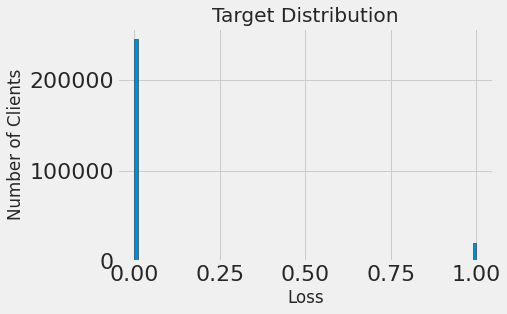

In [24]:
# # Single Variable Plots
figsize=(8, 8)

# Histogram of the loss
plt.style.use('fivethirtyeight')
plt.hist(df['TARGET'], bins = 100, edgecolor = 'k')
plt.xlabel('Loss') 
plt.ylabel('Number of Clients');
plt.title('Target Distribution')

In [25]:
# # Correlations between Features and Target

# Find all correlations and sort 
correlations_data = df.corr()['TARGET'].sort_values()

# Print the most positive correlations
print(correlations_data.tail(15), '\n')

# Print the most negative correlations
print(correlations_data.head(15))

AMT_GOODS_PRICE              -0.038085
REGION_POPULATION_RELATIVE   -0.034480
AMT_CREDIT                   -0.028883
AMT_ANNUITY                  -0.012828
AMT_INCOME_TOTAL             -0.001422
CNT_FAM_MEMBERS               0.011346
CNT_CHILDREN                  0.019205
TARGET                        1.000000
Name: TARGET, dtype: float64 

AMT_GOODS_PRICE              -0.038085
REGION_POPULATION_RELATIVE   -0.034480
AMT_CREDIT                   -0.028883
AMT_ANNUITY                  -0.012828
AMT_INCOME_TOTAL             -0.001422
CNT_FAM_MEMBERS               0.011346
CNT_CHILDREN                  0.019205
TARGET                        1.000000
Name: TARGET, dtype: float64


In [26]:
for i in df.columns:
    if len(set(df[i]))==1:
        df.drop(labels=[i], axis=1, inplace=True)

In [27]:
# Find all correlations and sort 
correlations_data = df.corr()['TARGET'].sort_values()

# Print the most positive correlations
print(correlations_data.tail(15), '\n')

# Print the most negative correlations
print(correlations_data.head(15))

AMT_GOODS_PRICE              -0.038085
REGION_POPULATION_RELATIVE   -0.034480
AMT_CREDIT                   -0.028883
AMT_ANNUITY                  -0.012828
AMT_INCOME_TOTAL             -0.001422
CNT_FAM_MEMBERS               0.011346
CNT_CHILDREN                  0.019205
TARGET                        1.000000
Name: TARGET, dtype: float64 

AMT_GOODS_PRICE              -0.038085
REGION_POPULATION_RELATIVE   -0.034480
AMT_CREDIT                   -0.028883
AMT_ANNUITY                  -0.012828
AMT_INCOME_TOTAL             -0.001422
CNT_FAM_MEMBERS               0.011346
CNT_CHILDREN                  0.019205
TARGET                        1.000000
Name: TARGET, dtype: float64


In [28]:
df.shape

(265871, 8)

### Feature Engineering and Selection

In [29]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        Threshold: any features with correlations greater than this value are removed
    
    Output: 
        Dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between TARGET
    y = x['TARGET']
    x = x.drop(columns = ['TARGET'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back in to the data
    x['TARGET'] = y
               
    return x

In [30]:
# Remove the collinear features above a specified correlation coefficient
data = remove_collinear_features(df, 0.6);

In [31]:
df.shape

(265871, 8)

In [32]:
# # # Split Into Training and Testing Sets

# Separate out the features and targets
features = data.drop(columns='TARGET')
targets = pd.DataFrame(data['TARGET'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(212696, 5)
(53175, 5)
(212696, 1)
(53175, 1)


In [33]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
# Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [35]:
X_train

array([[-5.82202952e-01, -1.32540638e-01, -8.04401261e-01,
         1.15035081e-01, -8.89196485e-01],
       [-5.82202952e-01,  5.48105533e-04,  2.38923919e+00,
         8.82969807e-01,  7.24447588e-01],
       [ 2.16446695e+00, -4.28952093e-01, -1.05146610e+00,
        -1.25598812e+00, -4.18328260e-02],
       ...,
       [ 7.91131997e-01,  1.96805424e-01, -1.52465303e-01,
        -6.55076860e-01,  1.85210261e+00],
       [ 7.91131997e-01,  4.43814970e-01, -2.41246598e-01,
        -3.80125747e-01,  1.85210261e+00],
       [-5.82202952e-01, -5.02041225e-02,  4.33142736e-01,
         1.01018135e+00, -7.78077983e-03]])

In [36]:
X_test

array([[ 2.16446695, -0.21487715, -1.0514661 , -1.25598812,  1.09172844],
       [-0.58220295, -0.081492  , -0.26831718,  0.05998265,  0.31677095],
       [ 0.791132  , -0.13254064, -0.1968615 ,  0.35701694,  0.27637516],
       ...,
       [-0.58220295,  0.69082452,  0.72438179,  1.23225725, -0.00778078],
       [-0.58220295, -0.16547524, -0.26831718,  0.84782334, -1.01847759],
       [ 0.791132  ,  0.11446891,  0.36721438,  0.64192104, -0.14362438]])

# Modeling

In [37]:
# # # Models to Evaluate

# We will compare five different machine learning Cassification models:

# 1 - Naive Bayes
# 2 - Random Forest Classification
# 3 - Gradiente Boosting Classification

# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_cross

In [38]:
# # Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive_cross = fit_and_evaluate(naive)

print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % naive_cross)

Naive Bayes Performance on the test set: Cross Validation Score = 0.9177


In [40]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.9152


In [42]:
# # Gradiente Boosting Classification
from xgboost import XGBClassifier
gb = XGBClassifier()
gb_cross = fit_and_evaluate(gb)

print('Gradiente Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

Gradiente Boosting Classification Performance on the test set: Cross Validation Score = 0.9230
